In [4]:
from astropy.io import fits
import h5py
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import treecorr

In [2]:
## Check the TXPipe outputs

In [3]:
#path_outputs =  '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/012922/area12300/with_shape_noise/2022/Feb1/'
path_outputs =  '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/012922/area12300/without_shape_noise/2022/Feb4/'

In [4]:
sheartomocat = h5py.File(path_outputs + 'shear_tomography_catalog.hdf5', 'r')

In [5]:
sheartomocat.keys()

<KeysViewHDF5 ['provenance', 'response', 'tomography']>

In [6]:
sheartomocat['tomography'].keys()

<KeysViewHDF5 ['N_eff', 'N_eff_2d', 'mean_e1', 'mean_e1_2d', 'mean_e2', 'mean_e2_2d', 'sigma_e', 'sigma_e_2d', 'source_bin', 'source_counts', 'source_counts_2d']>

In [7]:
bin = sheartomocat['tomography/source_bin'][:]

In [8]:
len(bin[bin==3])

78809359

In [9]:
sheartomocat['tomography/source_counts'][:]

array([78809359, 78809359, 78809359, 78809359, 78809359], dtype=int32)

In [5]:
shearcat.keys()

<KeysViewHDF5 ['provenance', 'shear']>

In [23]:
shearcat['shear'].keys()

<KeysViewHDF5 ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_all']>

In [7]:
shearcat['shear/bin_0'].keys()

<KeysViewHDF5 ['dec', 'g1', 'g2', 'ra', 'weight']>

In [8]:
for i in range(5):
    ra = shearcat['shear/bin_%d/ra'%i][:]
    dec = shearcat['shear/bin_%d/dec'%i][:]
    g1 = shearcat['shear/bin_%d/g1'%i][:]
    g2 = shearcat['shear/bin_%d/g2'%i][:]
    w = shearcat['shear/bin_%d/weight'%i][:]
    print(i)
    print(np.mean(g1))
    print(np.mean(g2))
    

0
-1.0676720108413362e-12
-3.6228917186989065e-13
1
-9.75813234007895e-13
1.1942528054868896e-15
2
1.0570757344813004e-12
-1.7484775684331077e-12
3
-2.624206820492997e-14
-6.001593826683063e-13
4
9.921047996987434e-13
2.5572916808124864e-13


In [51]:
len(g1)

78809359

## Compute correlation function

In [3]:
shearcat = h5py.File(path_outputs + 'binned_shear_catalog.hdf5', 'r')
i = 2
ra = shearcat['shear/bin_%d/ra'%i][:]
dec = shearcat['shear/bin_%d/dec'%i][:]
g1 = shearcat['shear/bin_%d/g1'%i][:]
g2 = shearcat['shear/bin_%d/g2'%i][:]
w = shearcat['shear/bin_%d/weight'%i][:]

mask = ra<80
#r = np.random.uniform(low=0.0, high=1.0, size=len(ra))

In [4]:
cat_s = treecorr.Catalog(ra=ra[mask], dec=dec[mask], g1=g1[mask], g2=g2[mask], w=w[mask], ra_units='deg', dec_units='deg')

In [5]:
gg = treecorr.GGCorrelation(nbins=15, min_sep=2.5, max_sep = 100, bin_slop=0.1, sep_units='arcmin')

In [6]:
gg.process(cat_s)
th = gg.meanlogr
xip = gg.xip

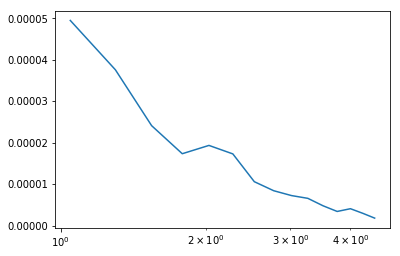

In [7]:
plt.plot(th, xip)
plt.xscale('log')


In [ ]:
cat

## Compute cross-correlation as a check

In [11]:
lenscat = h5py.File(path_outputs + 'binned_lens_catalog.hdf5', 'r')

In [15]:
lenscat['lens/bin_0'].keys()

<KeysViewHDF5 ['dec', 'ra', 'weight']>

In [16]:
i = 0
ra_l = lenscat['lens/bin_%d/ra'%i][:]
dec_l = lenscat['lens/bin_%d/dec'%i][:]
w_l = lenscat['lens/bin_%d/weight'%i][:]
mask_l = ra_l<80
cat_l = treecorr.Catalog(ra=ra_l[mask_l], dec=dec_l[mask_l], ra_units='deg', dec_units='deg')

In [36]:
ng = treecorr.NGCorrelation(nbins=15, min_sep=2.5, max_sep = 100, bin_slop=0.1, sep_units='arcmin')

In [8]:
ng.process(cat_l, cat_s)
th = np.exp(ng.logr)
gt = ng.xi

NameError: name 'ng' is not defined

this is for -g1, g2


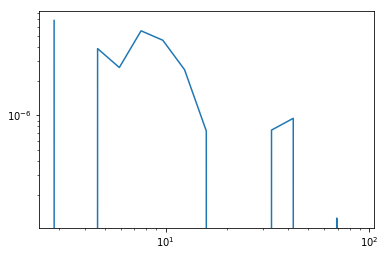

In [40]:
plt.plot(th, gt)
plt.xscale('log')
plt.yscale('log')

## Check randoms

In [4]:
rancat = h5py.File(path_outputs + 'binned_random_catalog.hdf5', 'r')

In [10]:
np.min(rancat['randoms/bin_0/ra'][:]), np.max(rancat['randoms/bin_0/ra'][:])

(1.0914586e-07, 360.0)

In [11]:
np.min(rancat['randoms/bin_0/dec'][:]), np.max(rancat['randoms/bin_0/dec'][:])

(-36.63245, 0.01864711)

## Check the noise maps

In [16]:
g2 =shearcat['shear/bin_3/g2'][:]

In [17]:
g2[10:20]

array([-0.23597364, -0.8819281 , -0.74554404, -0.57673727,  0.62592529,
       -0.03636114,  0.72046409, -0.70943231, -0.12006025,  0.63209543])

In [18]:
g2 =shearcat['shear/bin_4/g2'][:]

In [19]:
lnoise_maps = h5py.File(path_outputs + 'lens_noise_maps.hdf5', 'r')

In [20]:
lnoise_maps['maps/split_0/'].keys()

<KeysViewHDF5 ['ngal1_0', 'ngal1_1', 'ngal1_2', 'ngal1_3', 'ngal1_4', 'ngal2_0', 'ngal2_1', 'ngal2_2', 'ngal2_3', 'ngal2_4', 'rho1_0', 'rho1_1', 'rho1_2', 'rho1_3', 'rho1_4', 'rho2_0', 'rho2_1', 'rho2_2', 'rho2_3', 'rho2_4']>

In [21]:
pix0 = lnoise_maps['maps/split_0/ngal1_0/pixel']
value0 = lnoise_maps['maps/split_0/ngal1_0/value']
pix1 = lnoise_maps['maps/split_0/ngal2_0/pixel']
value1 = lnoise_maps['maps/split_0/ngal2_0/value']

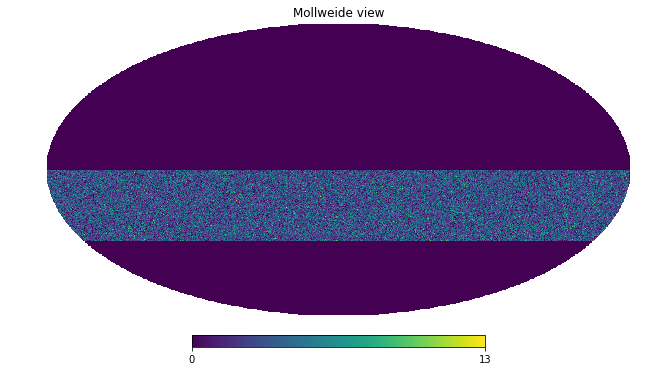

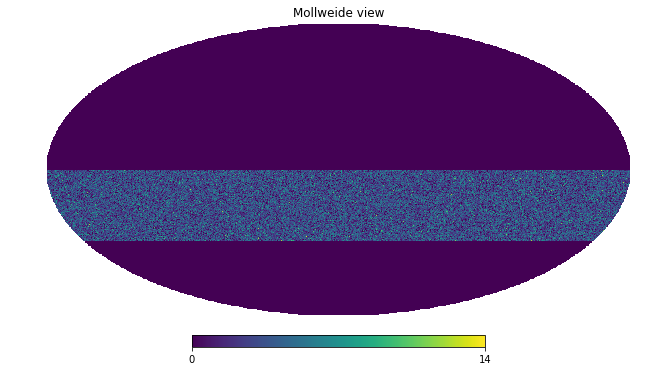

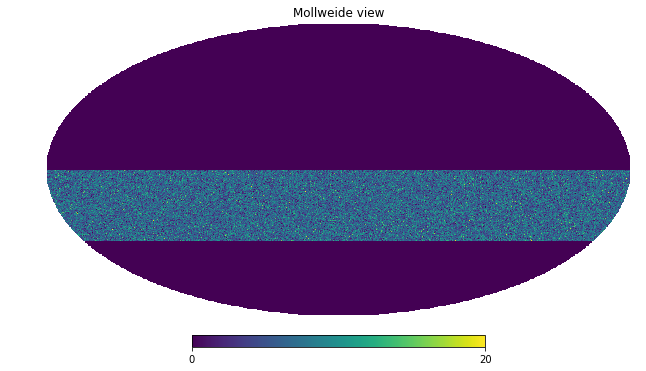

In [22]:
nside = 2048
npix = hp.nside2npix(nside)
#map = np.repeat(hp.UNSEEN, npix)
map0 = np.zeros(npix)
map1 = np.zeros(npix)
map0[pix0] = value0
map1[pix1] = value1
hp.mollview(map0)
hp.mollview(map1)
hp.mollview(map0+map1)

In [23]:
valuetotal = value0[:]+value1[:]
np.sum(valuetotal)/99744216

1.0000256656486226

In [64]:
value0

<HDF5 dataset "value": shape (15015936,), type "<f8">

## Plot patch centers

In [18]:
path_centers = '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/012922/area12300/without_shape_noise/2022/Feb4/patch_centers.txt'

In [19]:
n, x, y, z = np.loadtxt(path_centers, unpack = True) # patch, x,y,z

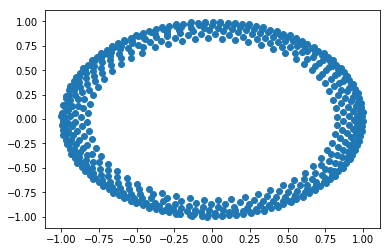

In [20]:
plt.scatter(x,y)

(array([57., 58., 56., 21., 52., 58., 44., 24., 66., 64.]),
 array([-0.56690487, -0.51378626, -0.46066766, -0.40754905, -0.35443045,
        -0.30131184, -0.24819324, -0.19507463, -0.14195603, -0.08883742,
        -0.03571882]),
 <a list of 10 Patch objects>)

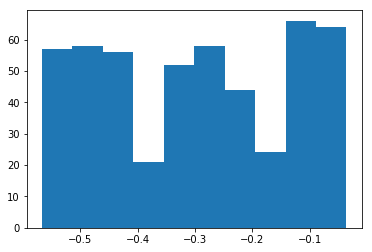

In [21]:
plt.hist(z)

In [22]:
n

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [25]:
cm = plt.cm.get_cmap("rainbow")
ra = np.arange(500)
dec = np.arange(500)
patch = np.arange(500)

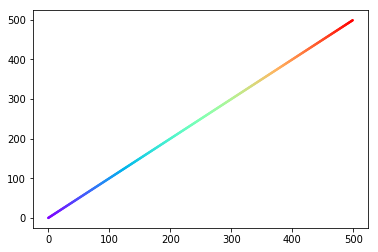

In [27]:
sc = plt.scatter(ra, dec, c=patch, cmap=cm, s=2, vmin=0)

In [ ]:
t = sacc.Sacc.load_fits(path)

NameError: name 'sacc' is not defined

## Check maps

In [2]:
path_maps_source = '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/022422/12300area/2022/March2/source_noise_maps.hdf5'

In [4]:
ms = h5py.File(path_maps_source, 'r')

In [16]:
ms['maps/'].keys()

<KeysViewHDF5 ['rotation_0', 'rotation_1', 'rotation_10', 'rotation_11', 'rotation_12', 'rotation_13', 'rotation_14', 'rotation_15', 'rotation_16', 'rotation_17', 'rotation_18', 'rotation_19', 'rotation_2', 'rotation_20', 'rotation_21', 'rotation_22', 'rotation_23', 'rotation_24', 'rotation_25', 'rotation_26', 'rotation_27', 'rotation_28', 'rotation_29', 'rotation_3', 'rotation_4', 'rotation_5', 'rotation_6', 'rotation_7', 'rotation_8', 'rotation_9']>

In [6]:
path_maps = '/global/projecta/projectdirs/lsst/groups/WL/users/jprat/gaussian_sims_srdnzs_fullsky/022422/12300area/TXPipe_outputs/source_maps.hdf5'
m = h5py.File(path_maps, 'r')

In [4]:
m['maps'].keys()

<KeysViewHDF5 ['g1_0', 'g1_1', 'g1_2', 'g1_2D', 'g1_3', 'g1_4', 'g2_0', 'g2_1', 'g2_2', 'g2_2D', 'g2_3', 'g2_4', 'lensing_weight_0', 'lensing_weight_1', 'lensing_weight_2', 'lensing_weight_2D', 'lensing_weight_3', 'lensing_weight_4', 'var_e_0', 'var_e_1', 'var_e_2', 'var_e_2D', 'var_e_3', 'var_e_4', 'var_g1_0', 'var_g1_1', 'var_g1_2', 'var_g1_2D', 'var_g1_3', 'var_g1_4', 'var_g2_0', 'var_g2_1', 'var_g2_2', 'var_g2_2D', 'var_g2_3', 'var_g2_4']>

In [5]:
m['maps/var_e_0'].keys()

<KeysViewHDF5 ['pixel', 'value']>

In [ ]:
m['maps/g1_0'].keys()

In [ ]:
global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/022422/12300area/2022/March2/density_maps.hdf5

## Lens density maps

In [8]:
path_maps_lens = '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/022422/12300area/2022/March2/density_maps.hdf5'

In [9]:
lm = h5py.File(path_maps_lens, 'r')

In [11]:
lm['maps/delta_0'].keys()

<KeysViewHDF5 ['pixel', 'value']>

## Check Variance Maps

In [111]:
path_maps_source = '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/022422_with_shape_noise/12300area/2022/April27/source_maps.hdf5'

In [112]:
ms = h5py.File(path_maps_source, 'r')

In [143]:
ms['maps'].keys()

<KeysViewHDF5 ['g1_0', 'g1_1', 'g1_2', 'g1_2D', 'g1_3', 'g1_4', 'g2_0', 'g2_1', 'g2_2', 'g2_2D', 'g2_3', 'g2_4', 'lensing_weight_0', 'lensing_weight_1', 'lensing_weight_2', 'lensing_weight_2D', 'lensing_weight_3', 'lensing_weight_4', 'var_e_0', 'var_e_1', 'var_e_2', 'var_e_2D', 'var_e_3', 'var_e_4', 'var_g1_0', 'var_g1_1', 'var_g1_2', 'var_g1_2D', 'var_g1_3', 'var_g1_4', 'var_g2_0', 'var_g2_1', 'var_g2_2', 'var_g2_2D', 'var_g2_3', 'var_g2_4']>

In [157]:
def plot_map(file_map, name):
    nside = 2048
    npix = hp.nside2npix(nside)
    map = np.zeros(npix)
    pix = file_map['maps/%s'%name]['pixel'][:]
    value = file_map['maps/%s'%name]['value'][:]
    print(value)
    map[pix]= value
    hp.mollview(map)

[3. 6. 4. ... 2. 5. 4.]


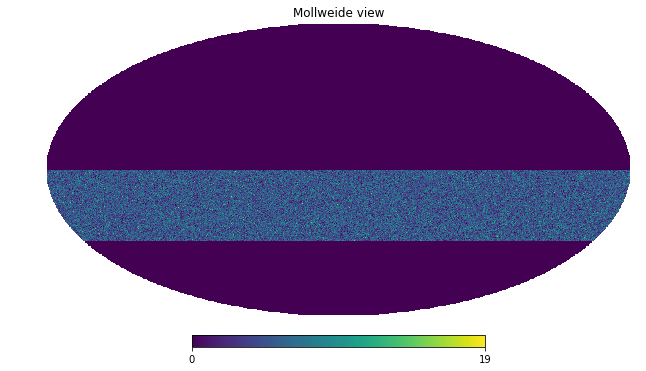

In [158]:
plot_map(ms, 'lensing_weight_0')

In [ ]:
plot_map(ms_1, 'lensing_weight_0')

In [113]:
ms['maps/var_e_0']['value'][0]

0.27016613992210564

In [141]:
vals = ms['maps/var_e_0']['value'][:]
vals_g1 = ms['maps/var_g1_0']['value'][:]

In [115]:
ms['maps/var_e_0']['pixel']

<HDF5 dataset "pixel": shape (14999552,), type "<i8">

In [116]:
np.min(vals), np.max(vals), np.mean(vals), np.mean(m_txpipe), np.std(m_txpipe)

(0.0,
 2.357449934315605,
 0.3549986278271073,
 0.020143366052700486,
 0.04814409126262225)

In [117]:
nside = 2048
npix = hp.nside2npix(nside)
m_txpipe = np.zeros(npix)
m_txpipe[ms['maps/var_e_0']['pixel'][:]] = vals

In [137]:
(vals == 0).sum()

78926

In [138]:
(vals_1 == 0).sum()

0

In [140]:
(vals == 0).sum()/len(vals)*100

0.5261890488462589

### Compare with Yuukis maps

In [103]:
path_yuuki_maps = '/global/projecta/projectdirs/lsst/groups/WL/users/yomori/repo/desc_analysis/gaussian_sims/gaussiancats/vmaps/vmap_0.npy' #it's actually a fits file

In [94]:
m_yuuki = hp.read_map('/global/cscratch1/sd/jprat/vmap_0.npy')
m_yuuki_dngal = hp.read_map('/global/cscratch1/sd/jprat/vmap_divngal_0.npy')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [97]:
m_yuuki

array([0.24393937, 1.06716907, 0.26697993, ..., 0.79425871, 0.25918949,
       0.48573875])

In [96]:
m_yuuki_dngal

array([0.01524621, 0.00881958, 0.0106792 , ..., 0.00980566, 0.02879883,
       0.00991304])

In [50]:
np.min(m_yuuki), np.max(m_yuuki)

(0.0, 2.742999315261841)

In [93]:
np.mean(m_yuuki)

0.35507111298235866

In [100]:
np.std(0.26)

0.0

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


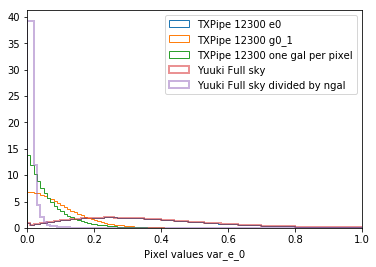

In [142]:

plt.hist(vals, bins = 200, range = (0, 2),histtype = 'step' , lw = 1, density = True, label = 'TXPipe 12300 e0', )
plt.hist(vals_g1, bins = 200, range = (0, 2),histtype = 'step' , lw = 1, density = True, label = 'TXPipe 12300 g0_1', )
plt.hist(vals_1, bins = 200, range = (0, 2),histtype = 'step' , lw = 1, density = True, label = 'TXPipe 12300 one gal per pixel', )
plt.hist(m_yuuki, alpha = 0.5,bins = 200, range = (0, 2), density = True, histtype = 'step' , lw = 2,ls = '-', label = 'Yuuki Full sky')
plt.hist(m_yuuki_dngal, alpha = 0.5,bins = 200, range = (0, 2), density = True, histtype = 'step' , lw = 2,ls = '-', label = 'Yuuki Full sky divided by ngal')
plt.xlabel('Pixel values var_e_0')
plt.xlim(0,1)
plt.legend()

In [136]:
len(m_yuuki)

50331648

In [135]:
len(vals),len(vals_1)

(14999552, 14999552)

In [61]:
vals

array([0.27016614, 0.72027435, 0.26557478, ..., 0.04076625, 0.31253347,
       0.29971601])

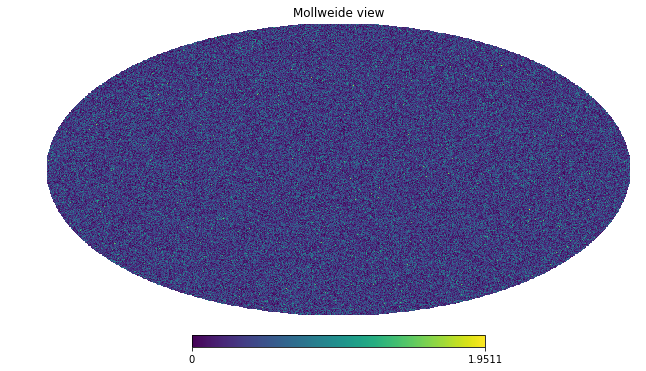

In [63]:
hp.mollview(m_yuuki)

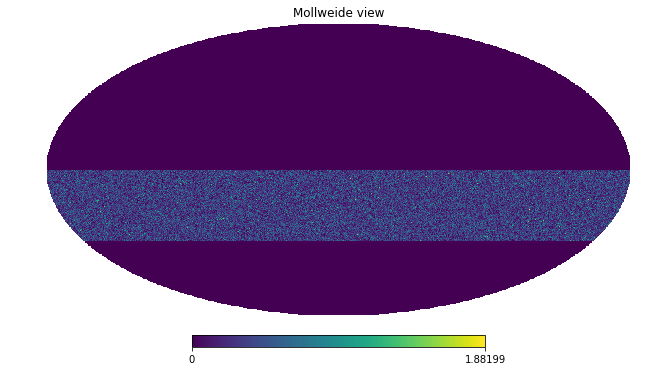

In [66]:
hp.mollview(m_txpipe)

In [ ]:
np.mean() 

## One galaxy per pixel maps

In [119]:
path_maps_source_onegalpix = '/global/cscratch1/sd/jprat/TXPipe/data/gaussian_sims/outputs_gaussian_sims/gaussian_sims_srdnzs_fullsky/022422_onegalperpixel/12300area/2022/April26/source_maps.hdf5'

In [120]:
ms_1 = h5py.File(path_maps_source_onegalpix, 'r')

In [128]:
nside = 2048
npix = hp.nside2npix(nside)
m_txpipe_1 = np.zeros(npix)
m_txpipe_1[ms_1['maps/var_e_0']['pixel'][:]] = ms_1['maps/var_e_0']['value'][:]
vals_1 = ms_1['maps/var_e_0']['value'][:]

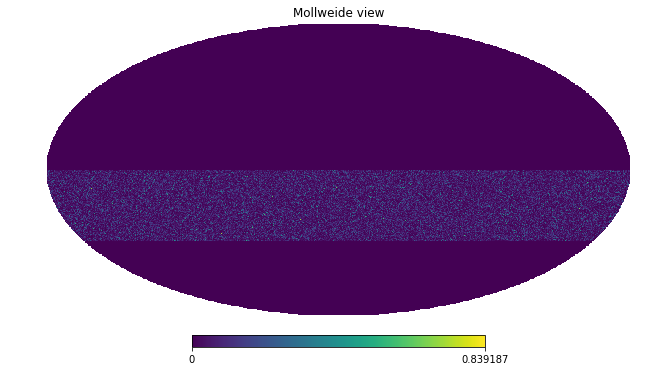

In [124]:
hp.mollview(m_txpipe_1)

In [125]:
np.max(m_txpipe_1)

1.116551279582137

In [126]:
np.mean(m_txpipe_1)

0.020143366052700486

(array([4.745725e+07, 2.322756e+06, 4.457300e+05, 8.557300e+04,
        1.643400e+04, 3.132000e+03, 6.420000e+02, 1.010000e+02,
        2.300000e+01, 7.000000e+00]),
 array([0.        , 0.11165513, 0.22331026, 0.33496538, 0.44662051,
        0.55827564, 0.66993077, 0.7815859 , 0.89324102, 1.00489615,
        1.11655128]),
 <a list of 10 Patch objects>)

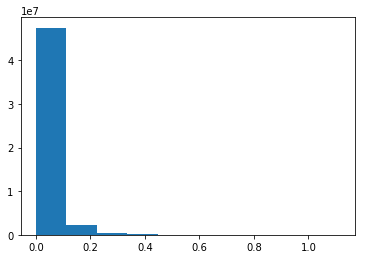

In [127]:
plt.hist(m_txpipe_1)

In [130]:
# From Yuuki

In [131]:
pix    = np.arange(hp.nside2npix(2048))
e1     = np.random.default_rng().normal(0,0.26,len(pix))
e2     = np.random.default_rng().normal(0,0.26,len(pix))
vmap   = np.bincount(pix,weights=0.5*(e1**2+e2**2),minlength=hp.nside2npix(nside))
tothit = np.bincount(pix,minlength=hp.nside2npix(nside)) # Should be weights but here all weights=1

ana=np.mean(vmap/tothit**2)*hp.nside2pixarea(2048)


AttributeError: module 'numpy.random' has no attribute 'default_rng'